CIFAR-10 — Image Classification (Animals Example)

This notebook trains a CNN on the CIFAR-10 dataset using TensorFlow/Keras.
The goal is to show a neural network that can recognize animals/objects from images and save logs/screenshots for the repository.

Source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10

In [1]:
import os
import sys
import numpy as np

sys.path.append("..")

from src.data import set_global_seed, load_cifar10
from src.models import build_cnn_small
from src.train import train_model, evaluate_model, get_true_labels
from src.plots import plot_training_history

os.makedirs("../screenshots", exist_ok=True)

set_global_seed(42)
print("Setup ready.")


Setup ready.


c:\Users\gabry\OneDrive\Pulpit\Szkoła\NAI\PROJECTS\Simple_AI_Games\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
X_train, X_test, y_train, y_test, class_names = load_cifar10(normalize=True)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Classes:", class_names)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Train shape: (50000, 32, 32, 3) (50000, 10)
Test shape: (10000, 32, 32, 3) (10000, 10)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

cnn = build_cnn_small(input_shape=input_shape, num_classes=num_classes)
cnn.summary()


Model: "CNN_Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 554,346 (2.11 MB)

 Trainable params: 554,346 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = train_model(
    cnn,
    X_train, y_train,
    X_val=X_test, y_val=y_test,
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4571 - loss: 1.5005 - val_accuracy: 0.5978 - val_loss: 1.1231
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6145 - loss: 1.0836 - val_accuracy: 0.6627 - val_loss: 0.9533
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6736 - loss: 0.9250 - val_accuracy: 0.6911 - val_loss: 0.8826
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7123 - loss: 0.8122 - val_accuracy: 0.7039 - val_loss: 0.8486
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7406 - loss: 0.7284 - val_accuracy: 0.7150 - val_loss: 0.8357
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7688 - loss: 0.6563 - val_accuracy: 0.7269 - val_loss: 0.8246
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7874 - loss: 0.5946 - val_accuracy: 0.7227 - val_loss: 0.8418
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8033 - loss: 0.5420 - val_accuracy: 0.

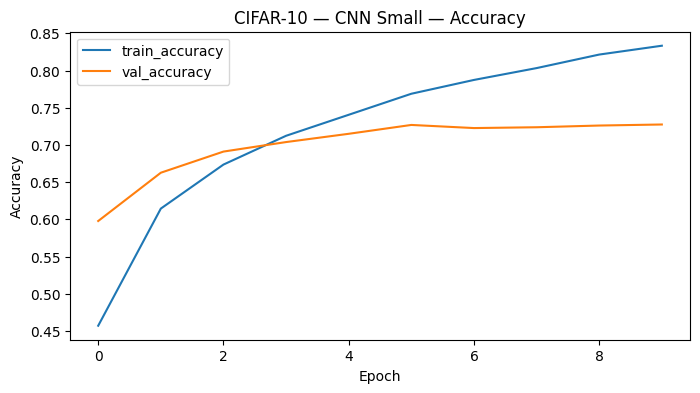

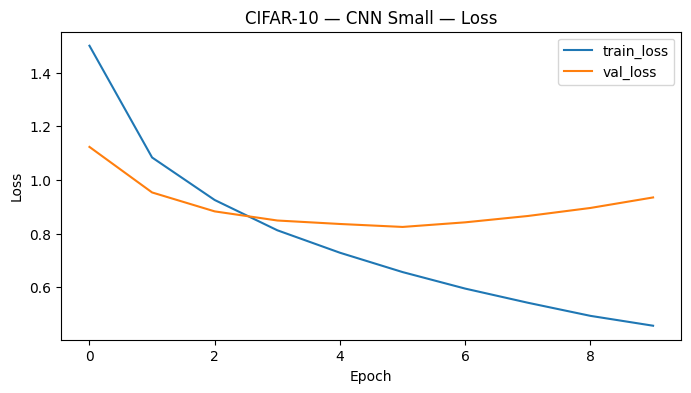

In [5]:
plot_training_history(
    history,
    title="CIFAR-10 — CNN Small",
    save_path="../screenshots/cifar10_cnn_small_history.png"
)


In [6]:
acc, y_pred = evaluate_model(cnn, X_test, y_test)
print("CNN Accuracy (CIFAR-10):", acc)


CNN Accuracy (CIFAR-10): 0.7275000214576721


The CNN learns to classify CIFAR-10 images with reasonable accuracy after a short training run.
This confirms that neural networks can handle image-based classification tasks beyond simple tabular datasets.